In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

In [87]:
# Load the data
df_a = pd.read_csv('./data/employee-status.csv')

df_a.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [88]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


# Task a

In [89]:
# Drop the rows with missing values in the columns used for analysis
df_a.dropna(subset=['avg_monthly_hrs', 'satisfaction'], inplace=True)

# Reset the index after dropping the rows
df_a.reset_index(drop=True, inplace=True)

# Filter employees that work more than 200 hours per month
employees_200_hours = df_a[df_a['avg_monthly_hrs'] > 200]

# Calculate the mean satisfaction of employees that work more than 200 hours per month
mean_satisfaction = employees_200_hours['satisfaction'].mean()

# Display the result
print(f'The mean satisfaction score of employees that work more than 200 hours per month is {mean_satisfaction:.2f}')

The mean satisfaction score of employees that work more than 200 hours per month is 0.63


Output: The mean satisfaction score of employees that work more than 200 hours per month is 0.63

# Task b

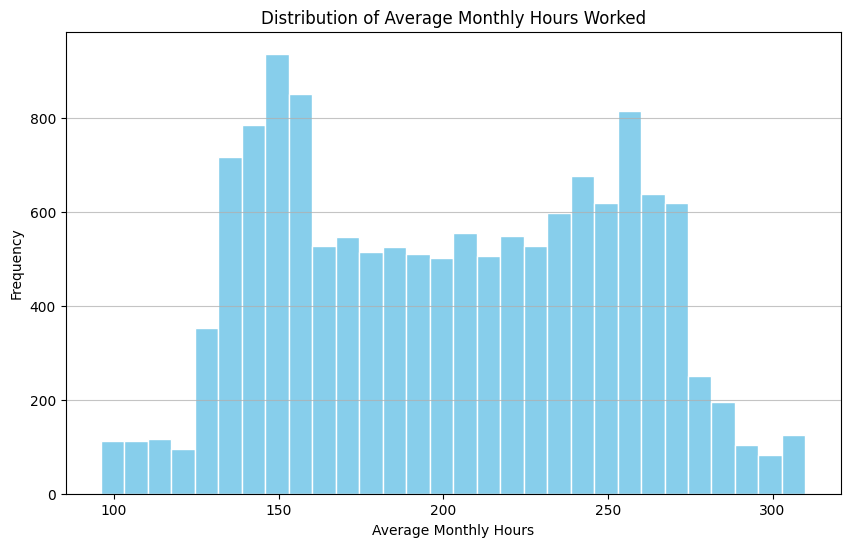

In [90]:
# Load the data
df_b = pd.read_csv('./data/employee-status.csv')

# Drop the rows with missing values in the columns used for analysis
df_b.dropna(subset=['avg_monthly_hrs', 'satisfaction'], inplace=True)

# Reset the index after dropping the rows
df_b.reset_index(drop=True, inplace=True)

# Create Histogram with 30 bins for average monthly hours
plt.figure(figsize=(10, 6))
plt.hist(df_b['avg_monthly_hrs'], bins=30, edgecolor='white', color='skyblue')
plt.title('Distribution of Average Monthly Hours Worked')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Task c

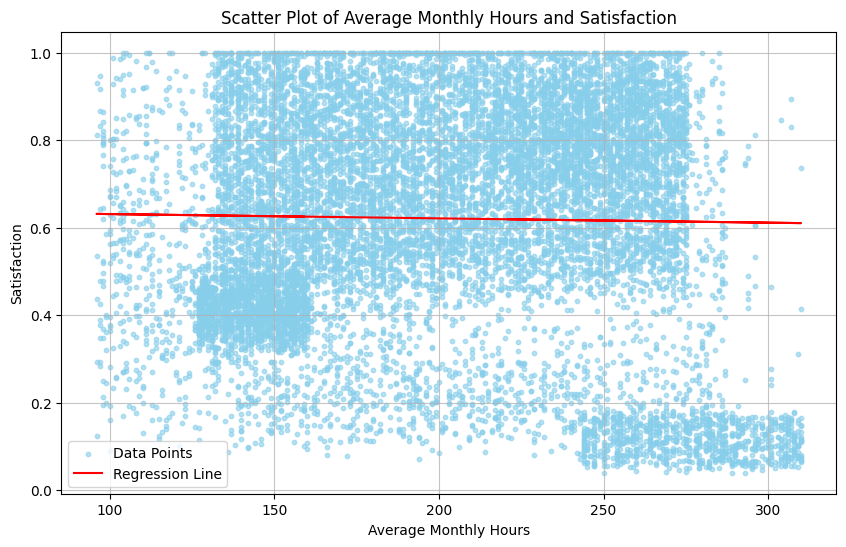

In [101]:
# Load the data
df_c = pd.read_csv('./data/employee-status.csv')

# Drop the rows with missing values in the columns used for analysis
df_c.dropna(subset=['avg_monthly_hrs', 'satisfaction'], inplace=True)

# Reset the index after dropping the rows
df_c.reset_index(drop=True, inplace=True)

# Scatter plot of avg_monthly_hrs and satisfaction with a regression line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_c['avg_monthly_hrs'], df_c['satisfaction'], color='skyblue', alpha=0.6, s=10, label='Data Points')

# Fit a linear regression model
X = df_c['avg_monthly_hrs'].values.reshape(-1, 1)
y = df_c['satisfaction'].values
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
regression_line = model.predict(X)

# Add the regression line
plt.plot(df_c['avg_monthly_hrs'], regression_line, color='red', label='Regression Line')

# Add titles and labels
plt.title('Scatter Plot of Average Monthly Hours and Satisfaction')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction')
plt.legend()
plt.grid(axis='both', alpha=0.75)
plt.show()

In [92]:
# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_c['avg_monthly_hrs'], df_c['satisfaction'])

# Display the correlation coefficient and p-value
print(f'The Pearson correlation coefficient is {correlation:.2f}')
print(f'The p-value is {p_value:.2f}')

The Pearson correlation coefficient is -0.02
The p-value is 0.02


Output:  
The Pearson correlation coefficient is -0.02  
The p-value is 0.02  

The Pearsons correlation coefficient is close to zero (-0.02) which indicates that there is no significant linear relationship between the average monthly hours worked and the satisfaction level of employees. The p-value is less than 0.05 which indicates that the correlation is statistically significant. This can also be seen in the scatter plot where there is no clear linear relationship between the two variables.

There is no significant linear relationship between avg_monthly_hrs and the satisfaction level of employees. 

# Task d

In [93]:
# Load the data
df_d = pd.read_csv('./data/employee-status.csv')

# Drop the rows with missing values in the columns used for analysis
df_d.dropna(subset=['status', 'avg_monthly_hrs', 'satisfaction', 'tenure'], inplace=True)

# Reset the index after dropping the rows
df_d.reset_index(drop=True, inplace=True)

# If filed_complaint is missing, fill it with 0
df_d['filed_complaint'] = df_d['filed_complaint'].fillna(0)

# Convert the status column to binary values
df_d['status'] = df_d['status'].map({'Employed': 1, 'Left': 0})

# Split feature and target variables
y = df_d['status']
X = df_d[['avg_monthly_hrs', 'filed_complaint', 'satisfaction', 'tenure']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(min_impurity_decrease=0.01, max_depth=4, class_weight='balanced')
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Display the classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       656
           1       0.98      0.88      0.93      2158

    accuracy                           0.89      2814
   macro avg       0.84      0.91      0.86      2814
weighted avg       0.91      0.89      0.90      2814



In [94]:
dotfile = open('./dot/task_d.dot', 'w')
tree.export_graphviz(classifier, out_file = dotfile, feature_names=X.columns, class_names=['Left','Employed'])
dotfile.close()

![Decision tree](./images/task_d_tree.png)

In [95]:
# Make predictions on both the training and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Display the classification report for both sets
train_report = classification_report(y_train, y_train_pred, zero_division=0)
test_report = classification_report(y_test, y_test_pred, zero_division=0)

print("Training Set Report:\n", train_report)
print("Test Set Report:\n", test_report)

Training Set Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81      2711
           1       0.97      0.88      0.93      8543

    accuracy                           0.89     11254
   macro avg       0.84      0.90      0.87     11254
weighted avg       0.91      0.89      0.90     11254

Test Set Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       656
           1       0.98      0.88      0.93      2158

    accuracy                           0.89      2814
   macro avg       0.84      0.91      0.86      2814
weighted avg       0.91      0.89      0.90      2814



# Task e
The decision tree does not appear to be overfitted. Both the training and test sets display similar performance metrics, suggesting that the model generalizes well to unseen data, thus indicating no overfitting. Although some nodes in the decision tree show Gini scores of 0.0, indicative of perfect classification at those nodes, the overall Gini scores do not show signs of overfitting. The sample sizes at each node, while on the smaller side, are good for generalization; however, it's important to note that very small sample sizes in some nodes could potentially lead to overfitting. Overall, the decision tree has a good balance between complexity and performance on new data, without signs of overfitting.

# Task f

In [96]:
# Load the data
df_f = pd.read_csv('./data/employee-status.csv')

# Drop the rows with missing values in the columns used for analysis
df_f.dropna(subset=['status', 'avg_monthly_hrs', 'satisfaction', 'tenure'], inplace=True)

# Reset the index after dropping the rows
df_f.reset_index(drop=True, inplace=True)

# If filed_complaint is missing, fill it with 0
df_f['filed_complaint'] = df_f['filed_complaint'].fillna(0)

# Split feature and target variables
y = df_f['status']
X = df_f[['avg_monthly_hrs', 'filed_complaint', 'satisfaction', 'tenure']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the value of k = 8
k = 8

# Train the model with the chosen value of k
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_scaled, y_train)

# Predict the values on the test set
predicted_values = knn.predict(X_test_scaled)

# Assess the performance of the model
conf_matrix = confusion_matrix(y_test, predicted_values)
print(f"Confusion Matrix: \n{conf_matrix}")
print("\n")

# Calculate the True Positives, True Negatives, False Positives, and False Negatives
tp = conf_matrix[0][0]
tn = conf_matrix[1][1]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

print(f'True Positives: {tp}')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print("\n")

# Calculate the accuracy and precision
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print("\n")

# Calculate the f1 score
f1_score = 2 * (precision * precision) / (precision + precision) if (precision + precision) != 0 else 0

print(f'F1 Score: {f1_score:.2f}')

Confusion Matrix: 
[[2105   53]
 [  70  586]]


True Positives: 2105
True Negatives: 586
False Positives: 53
False Negatives: 70


Accuracy: 0.96
Precision: 0.98


F1 Score: 0.98


Output:  
Confusion Matrix:  
[[2105  53]  
 [  70  586]]  


True Positives: 2105  
True Negatives: 586  
False Positives: 53  
False Negatives: 70  


Accuracy: 0.96  
Precision: 0.98  


F1 Score: 0.98  

#### The F1 score of my decision tree is:

![image of the decision tree scores](./images/task_d_report.png)

##### F1 Score: 0.90 (weighted)

#### The F1 score of my KNN model is:
##### F1 Score: 0.98

The KNN model has a higher F1 score than the decision tree model. This indicates that the KNN model is better at predicting the status of employees based on the given features.

# Task g


In [97]:
df_g = pd.read_csv('./data/employee-status.csv')

# Drop the rows with missing values in the columns used for analysis
df_g.dropna(subset=['satisfaction', 'n_projects', 'tenure', 'avg_monthly_hrs'], inplace=True)

# Reset the index after dropping the rows
df_g.reset_index(drop=True, inplace=True)

# Convert the status column to binary values
df_g['status'] = df_g['status'].map({'Employed': 1, 'Left': 0})

# Split feature and target variables
y = df_g['status']
X = df_g[['satisfaction', 'n_projects', 'tenure', 'avg_monthly_hrs']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
regressor = DecisionTreeRegressor(min_impurity_decrease=0.0001, max_depth=3)
regressor.fit(X_train, y_train)

dotfile = open('./dot/task_g.dot', 'w')
tree.export_graphviz(regressor, out_file = dotfile, feature_names=X.columns, class_names=['Employed','Left'])
dotfile.close()

# Identify the parameters for those who are the most satisfied (highest predicted satisfaction)
highest_satisfaction_indexes = regressor.apply(X).argmax()
highest_satisfaction_params = X.iloc[highest_satisfaction_indexes]

print(f'The parameters for the most satisfied employee are:')
print(highest_satisfaction_params)

The parameters for the most satisfied employee are:
satisfaction         0.829896
n_projects           4.000000
tenure               5.000000
avg_monthly_hrs    221.000000
Name: 0, dtype: float64


Output:  

The parameters for the most satisfied employee are:  
satisfaction         0.829896  
n_projects           4.000000  
tenure              5.000000  
avg_monthly_hrs    221.000000  
Name: 0, dtype: float64  


![image of the decision tree](./images/task_g_tree.png)